<a href="https://colab.research.google.com/github/mihwa-kim/Data_Analysis/blob/main/Quantium_Data_preparation_and_customer_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Analysis]**
* Customers who use Mainstream is biggest.
* Order singles/couples has biggest portion compared with other life styles-20.57%
* The sales in December are higher than in other months, with no issues observed when analyzing the data by year or day.
* Customers who have a routine make up a larger portion than those who do not have a routine.
* During the period, the most popular item sold was the Dorito Corn Chip Supreme, with sales exceeding $40,352.

**[Conclusion]**

Our target customers should be those who purchase Mainstream and Order singles or couples. In addition, we could run a December promotion with a strong emphasis on the Dorito Corn Chip Supreme. Let's be aggressive in our marketing strategy during this time.

In [1]:
import pandas as pd

In [2]:
purchase_df = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [3]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
transaction_df = pd.read_csv('QVI_transaction_data.csv')
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018.10.17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019.5.14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019.5.20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018.8.17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018.8.18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019.3.9,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018.8.13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018.11.6,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018.12.27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [5]:
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [7]:
transaction_df['DATE'] = transaction_df['DATE'].apply(pd.to_datetime)
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [8]:
transaction_df['year'] = transaction_df['DATE'].dt.year
transaction_df['month'] = transaction_df['DATE'].dt.month
transaction_df['day'] = transaction_df['DATE'].dt.day
transaction_df['hour'] = transaction_df['DATE'].dt.hour
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,year,month,day,hour
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,17,0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,14,0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,20,0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,17,0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,3,9,0
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,8,13,0
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,11,6,0
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,12,27,0


In [9]:
purchase_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [10]:
transaction_join = pd.merge(transaction_df, purchase_df, on='LYLTY_CARD_NBR', how='left')
transaction_join

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,year,month,day,hour,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,17,0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,14,0,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,20,0,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,17,0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,18,0,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,3,9,0,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,8,13,0,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,11,6,0,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,12,27,0,YOUNG SINGLES/COUPLES,Premium


In [11]:
transaction_join.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,year,month,day,hour
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000,264836.000000,264836.000000,264836.0
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,2018.495193,6.535841,15.713177,0.0
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,0.499978,3.448856,8.775849,0.0
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,2018.000000,1.000000,1.000000,0.0
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,2018.000000,4.000000,8.000000,0.0
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,2018.000000,7.000000,16.000000,0.0
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,2019.000000,10.000000,23.000000,0.0
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019.000000,12.000000,31.000000,0.0


In [12]:
transaction_join.groupby("PREMIUM_CUSTOMER")["LYLTY_CARD_NBR"].count()

PREMIUM_CUSTOMER
Budget         93157
Mainstream    101988
Premium        69691
Name: LYLTY_CARD_NBR, dtype: int64

In [13]:
transaction_join.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
OLDER FAMILIES            48596
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
Name: LYLTY_CARD_NBR, dtype: int64

In [14]:
del transaction_join['hour']

In [15]:
transaction_join['yearmonth'] = transaction_join['DATE'].dt.strftime("%Y%m")

transaction_join

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,year,month,day,LIFESTAGE,PREMIUM_CUSTOMER,yearmonth
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,17,YOUNG SINGLES/COUPLES,Premium,201810
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,14,MIDAGE SINGLES/COUPLES,Budget,201905
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,20,MIDAGE SINGLES/COUPLES,Budget,201905
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,17,MIDAGE SINGLES/COUPLES,Budget,201808
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,18,MIDAGE SINGLES/COUPLES,Budget,201808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,3,9,YOUNG SINGLES/COUPLES,Premium,201903
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,8,13,YOUNG SINGLES/COUPLES,Premium,201808
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,11,6,YOUNG SINGLES/COUPLES,Premium,201811
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,12,27,YOUNG SINGLES/COUPLES,Premium,201812


In [16]:
pie_labels = transaction_join.groupby("PREMIUM_CUSTOMER")["LYLTY_CARD_NBR"].count().index.tolist()
pie_values = transaction_join.groupby("PREMIUM_CUSTOMER")["LYLTY_CARD_NBR"].count().values.tolist()
print(pie_labels)
print(pie_values)

['Budget', 'Mainstream', 'Premium']
[93157, 101988, 69691]


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

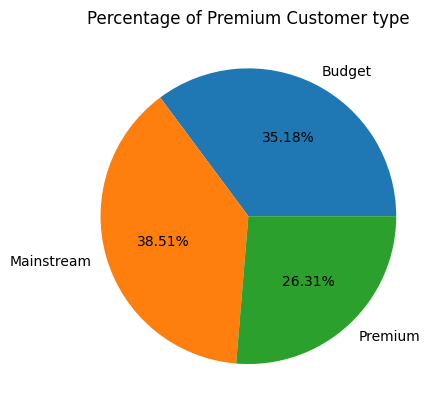

In [18]:
plt.pie(pie_values,labels=pie_labels, autopct='%.02f%%')
plt.title('Percentage of Premium Customer type')
plt.show()
#Customers who use Mainstream is biggest.

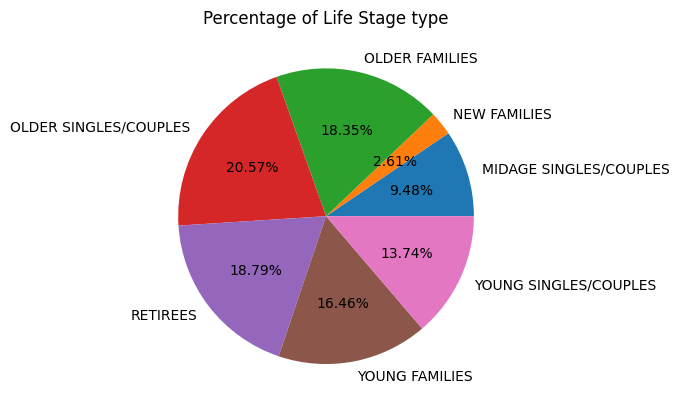

In [19]:
pie_labels = transaction_join.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].count().index.tolist()
pie_values = transaction_join.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].count().values.tolist()

plt.pie(pie_values,labels=pie_labels, autopct='%.02f%%')
plt.title('Percentage of Life Stage type')
plt.show()
#Order singles/couples has biggest portion compared with other life styles-20.57%

In [26]:
transaction_date = pd.DataFrame(transaction_join.groupby(['year','month','day'],as_index=False)['STORE_NBR'].count())
transaction_date.rename(columns={"STORE_NBR":"count"}, inplace=True)
transaction_date

,year,month,day,count
0,2018,7,1,724
1,2018,7,2,711
2,2018,7,3,722
3,2018,7,4,714
4,2018,7,5,712
...,...,...,...,...
359,2019,6,26,723
360,2019,6,27,709
361,2019,6,28,730
362,2019,6,29,745


[Text(0, 0.5, 'day'), Text(0.5, 1.0, 'Day')]

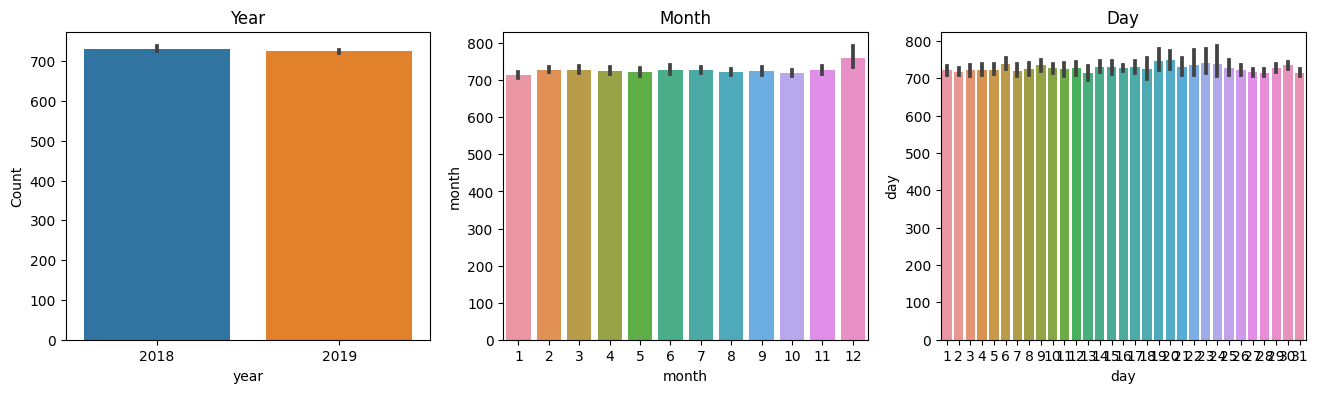

In [27]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(16,4)

sns.barplot(data=transaction_date, x='year', y='count', ax=ax1)
sns.barplot(data=transaction_date, x='month', y='count', ax=ax2)
sns.barplot(data=transaction_date, x='day', y='count', ax=ax3)

ax1.set(ylabel='Count', title='Year')
ax2.set(ylabel='month', title='Month')
ax3.set(ylabel='day', title='Day')

# The sales in December are higher than in other months, with no issues observed when analyzing the data by year or day.

In [29]:
transaction_date = pd.DataFrame(transaction_join.groupby(['LYLTY_CARD_NBR'],as_index=False)['LIFESTAGE'].count())
transaction_date.rename(columns={"LIFESTAGE":"count"}, inplace=True)
transaction_date

,LYLTY_CARD_NBR,count
0,1000,1
1,1002,1
2,1003,2
3,1004,1
4,1005,1
...,...,...
72632,2370651,1
72633,2370701,1
72634,2370751,1
72635,2370961,2


In [44]:
#routine_flg = IF customer purchases more than 4 times during the period, I describe '1'.
transaction_date["routine_flg"] = 0
transaction_date["routine_flg"] = transaction_date["routine_flg"].where(transaction_date["count"]<4, 1)
transaction_date

,LYLTY_CARD_NBR,count,routine_flg
0,1000,1,0
1,1002,1,0
2,1003,2,0
3,1004,1,0
4,1005,1,0
...,...,...,...
72632,2370651,1,0
72633,2370701,1,0
72634,2370751,1,0
72635,2370961,2,0


In [48]:
purchase_join = pd.merge(purchase_df, transaction_date[["LYLTY_CARD_NBR","routine_flg"]], on="LYLTY_CARD_NBR", how='left')
purchase_join.groupby('routine_flg').count()
#Customers who have a routine make up a larger portion than those who do not have a routine.

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
routine_flg,,,
0,41736,41736,41736
1,30901,30901,30901


In [51]:
transaction_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   year              264836 non-null  int64         
 9   month             264836 non-null  int64         
 10  day               264836 non-null  int64         
 11  LIFESTAGE         264836 non-null  object        
 12  PREMIUM_CUSTOMER  264836 non-null  object        
 13  yearmonth         264836 non-null  object        
dtypes: d

In [61]:
prod_count = transaction_join.groupby('PROD_NAME',as_index=False)['PROD_QTY','TOT_SALES'].sum()
prod_count.sort_values(['PROD_QTY','TOT_SALES'], ascending=False)
# During the period, the most popular item sold was the Dorito Corn Chip Supreme, with sales exceeding $40,352.

<ipython-input-61-490dd4480a87>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prod_count = transaction_join.groupby('PROD_NAME',as_index=False)['PROD_QTY','TOT_SALES'].sum()


,PROD_NAME,PROD_QTY,TOT_SALES
11,Dorito Corn Chp Supreme 380g,6509,40352.0
33,Kettle Mozzarella Basil & Pesto 175g,6381,34457.4
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309,29021.4
8,Cobs Popd Sea Salt Chips 110g,6277,23852.6
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256,23772.8
...,...,...,...
62,RRD Pc Sea Salt 165g,2702,8106.0
112,Woolworths Medium Salsa 300g,2700,4050.0
43,NCC Sour Cream & Garden Chives 175g,2682,8046.0
105,WW Crinkle Cut Original 175g,2666,4532.2
